In [1]:
import pandas as pd
import numpy as np

In [2]:
col_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]

In [3]:
df = pd.read_csv("Iris.csv", names=col_names, sep=",")
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

### Data cleaning and preprocessing

In [6]:
df[df['sepal length'] == '?']
for cols in df.columns:
    df[df[cols]=='?'].shape[0]

In [7]:
df[df['sepal length'] < 0]
# no negative values in dataset

,sepal length,sepal width,petal length,petal width,class


### Data Transformation

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
lb = LabelEncoder()
lb.fit(df['class'])
lb.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['class'] = lb.transform(df['class'])
# run this cell only once

In [11]:
df['class'].unique()

array([0, 1, 2])

### Detecting outlier and removing it

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# selecting only numberical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

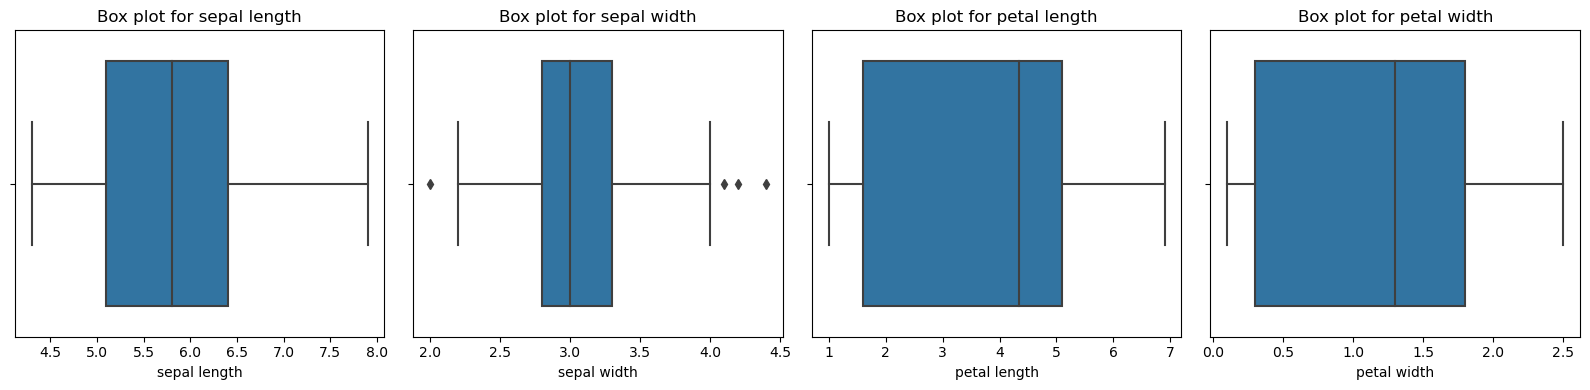

In [28]:
def vis_outliers(df):
    num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)

    row = (num_cols+3)//4
    cols = min(num_cols, 4)

    fig, axes = plt.subplots(row, cols, figsize=(16, row*4))
    axes = axes.flatten()

    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        sns.boxplot(ax = axes[i], x=df[col])
        axes[i].set_title(f"Box plot for {col}")
        axes[i].set_xlabel(col)
    # hide unwanted plots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

vis_outliers(df)

In [33]:
def remove_outliers(data, threshold=3):
    zscore = (data-data.mean())/data.std()
    out = zscore > 3
    data = data[~out.any(axis=1)]
    return data
df_cleaned = remove_outliers(df)

In [37]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)

    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lst = df.index[ (df[ft] < lower_bound)  | (df[ft] > upper_bound)]

    return lst

In [38]:
# Store all indices of outliers in empty list
index_list = []
for i, col in enumerate(df.select_dtypes(include=["int64", "float64"]).columns):
    index_list.extend(outliers(df=df, ft=col))

In [40]:
def remove(df, lst):
    lst = sorted(set(lst))
    df = df.drop(lst)
    return df
df2 = remove(df=df, lst=index_list)

In [41]:
df2.shape

(146, 5)

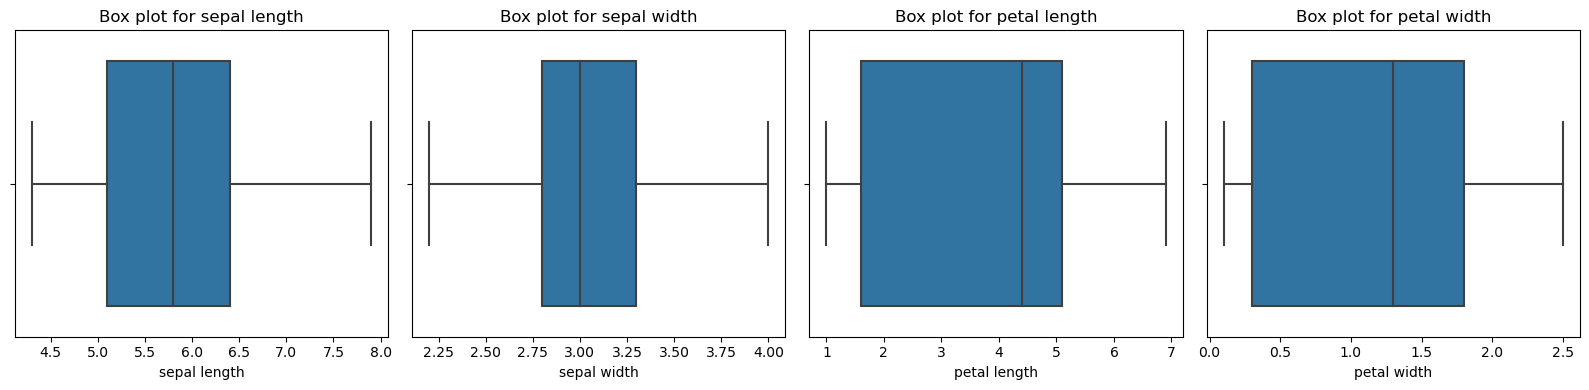

In [42]:
vis_outliers(df2)

### Create data subsets for different species

In [54]:
class_setosa = df2[df2['class']==0]
class_versicolour = df2[df2['class']==1]
class_virginica = df2[df2['class']==2]

In [55]:
print("Class Setosa", class_setosa.shape)
print("Class versicolour", class_versicolour.shape)
print("Class virginica", class_virginica.shape)

Class Setosa (47, 5)
Class versicolour (49, 5)
Class virginica (50, 5)


### Merge two subsets

In [56]:
merged = pd.concat([class_setosa, class_versicolour])
merged.shape

(96, 5)

### Sort Data Petal Length

In [57]:
sorted_data = df2.sort_values(by=["petal length"])
print(sorted_data)

     sepal length  sepal width  petal length  petal width  class
22            4.6          3.6           1.0          0.2      0
13            4.3          3.0           1.1          0.1      0
35            5.0          3.2           1.2          0.2      0
14            5.8          4.0           1.2          0.2      0
2             4.7          3.2           1.3          0.2      0
..            ...          ...           ...          ...    ...
131           7.9          3.8           6.4          2.0      2
105           7.6          3.0           6.6          2.1      2
122           7.7          2.8           6.7          2.0      2
117           7.7          3.8           6.7          2.2      2
118           7.7          2.6           6.9          2.3      2

[146 rows x 5 columns]


In [53]:
sorted_data_descending = df2.sort_values(by=["petal length"], ascending=False)
print(sorted_data_descending)


     sepal length  sepal width  petal length  petal width  class
118           7.7          2.6           6.9          2.3      2
117           7.7          3.8           6.7          2.2      2
122           7.7          2.8           6.7          2.0      2
105           7.6          3.0           6.6          2.1      2
131           7.9          3.8           6.4          2.0      2
..            ...          ...           ...          ...    ...
2             4.7          3.2           1.3          0.2      0
14            5.8          4.0           1.2          0.2      0
35            5.0          3.2           1.2          0.2      0
13            4.3          3.0           1.1          0.1      0
22            4.6          3.6           1.0          0.2      0

[146 rows x 5 columns]


### Transposing Data

In [58]:
transpoed = df2.transpose()
transpoed

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
class,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


### Melting Data to long format
- "Pivoting" the data means reorganizing it so that each unique observation is represented by a single row, and each variable is in a separate column. This is often referred to as "long" format.
- So, "unpivoting" (which is what pandas.melt() does) is the process of transforming data from wide format to long format. It takes columns and turns them into rows.

In [59]:
df2.columns.unique()

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [66]:
df_melted = pd.melt(df2, id_vars=["class"], var_name="Attribute", value_name='value')
df_melted

,class,Attribute,value
0,0,sepal length,5.1
1,0,sepal length,4.9
2,0,sepal length,4.7
3,0,sepal length,4.6
4,0,sepal length,5.0
...,...,...,...
579,2,petal width,2.3
580,2,petal width,1.9
581,2,petal width,2.0
582,2,petal width,2.3


### Casting data to wide format

In [67]:
casted_df = df_melted.pivot_table(index='class', columns='Attribute', values='value', aggfunc='mean')
casted_df

Attribute,petal length,petal width,sepal length,sepal width
class,,,,
0,1.46383,0.244681,4.976596,3.365957
1,4.27551,1.332653,5.955102,2.785714
2,5.55200,2.026000,6.588000,2.974000
